In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

DATA = Path("../data/processed/ethiopia_fi_unified_data_enriched.xlsx")

obs = pd.read_excel(DATA, sheet_name="ethiopia_fi_unified_data")
links = pd.read_excel(DATA, sheet_name="Impact_sheet")

obs["observation_date"] = pd.to_datetime(obs["observation_date"])


In [3]:
obs["record_type"].value_counts()
pd.crosstab(obs["record_type"], obs["pillar"])
obs["confidence"].value_counts()

confidence
high      40
medium     4
Name: count, dtype: int64

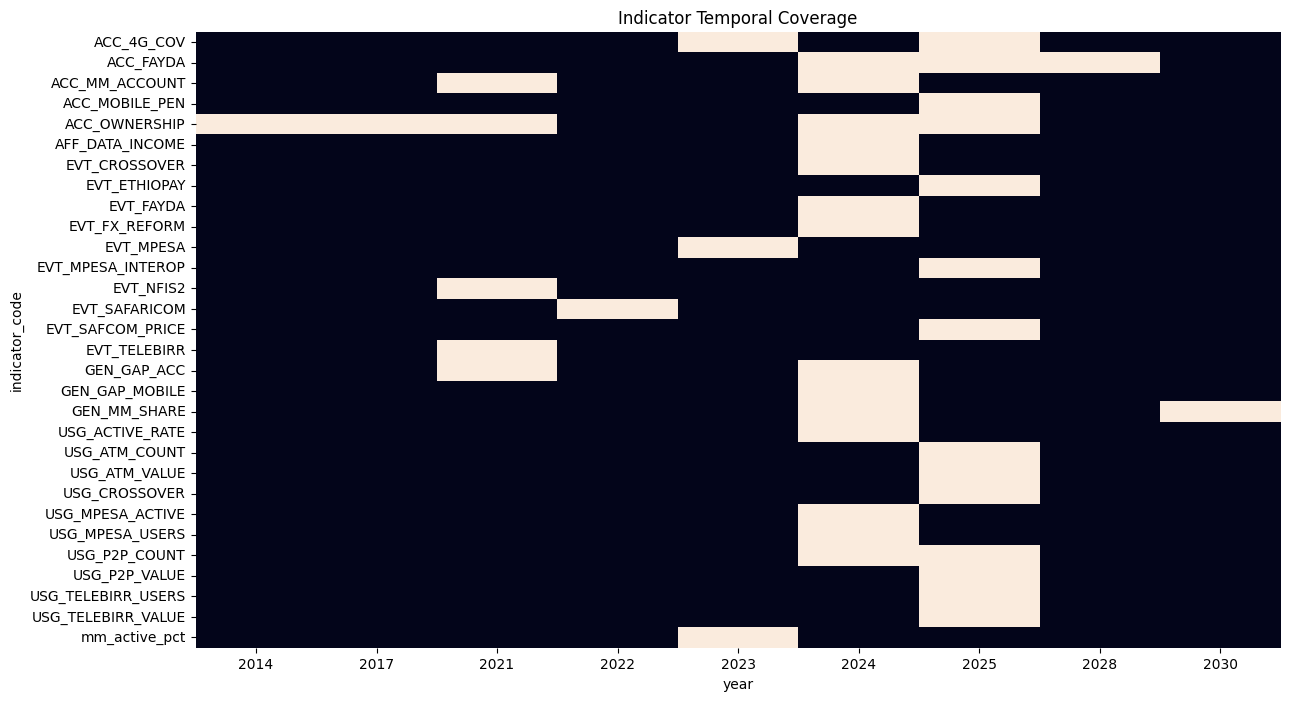

In [4]:
obs["year"] = obs["observation_date"].dt.year

coverage = obs.pivot_table(
    index="indicator_code",
    columns="year",
    values="value_numeric",
    aggfunc="count"
)

plt.figure(figsize=(14, 8))
sns.heatmap(coverage.notna(), cbar=False)
plt.title("Indicator Temporal Coverage")
plt.show()


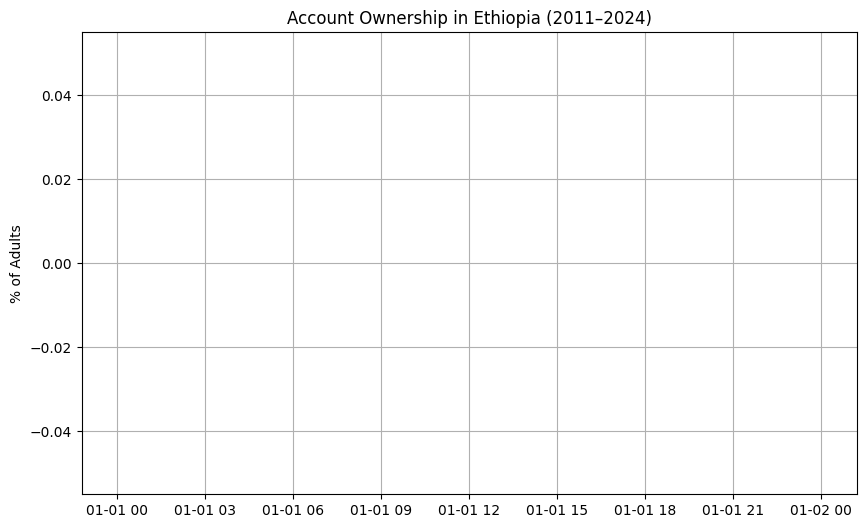

In [5]:
access = obs[obs["indicator_code"] == "account_ownership_pct"]

plt.figure(figsize=(10, 6))
plt.plot(access["observation_date"], access["value_numeric"], marker="o")
plt.title("Account Ownership in Ethiopia (2011–2024)")
plt.ylabel("% of Adults")
plt.grid(True)
plt.show()


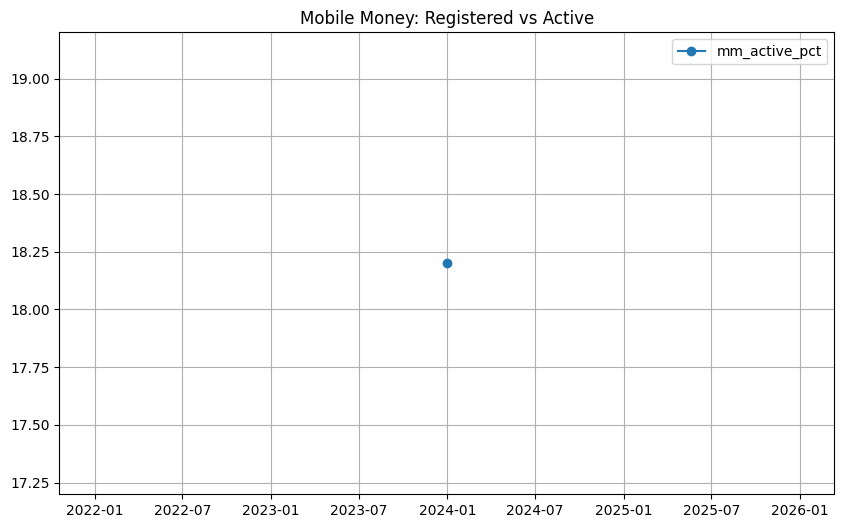

In [6]:
mm = obs[obs["indicator_code"].isin(["mm_registered_pct", "mm_active_pct"])]

plt.figure(figsize=(10, 6))
for code, g in mm.groupby("indicator_code"):
    plt.plot(g["observation_date"], g["value_numeric"], marker="o", label=code)

plt.legend()
plt.title("Mobile Money: Registered vs Active")
plt.grid(True)
plt.show()


/var/folders/nf/drxnv59536v7bnknmx3c_1zw0000gn/T/ipykernel_43732/3050539378.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


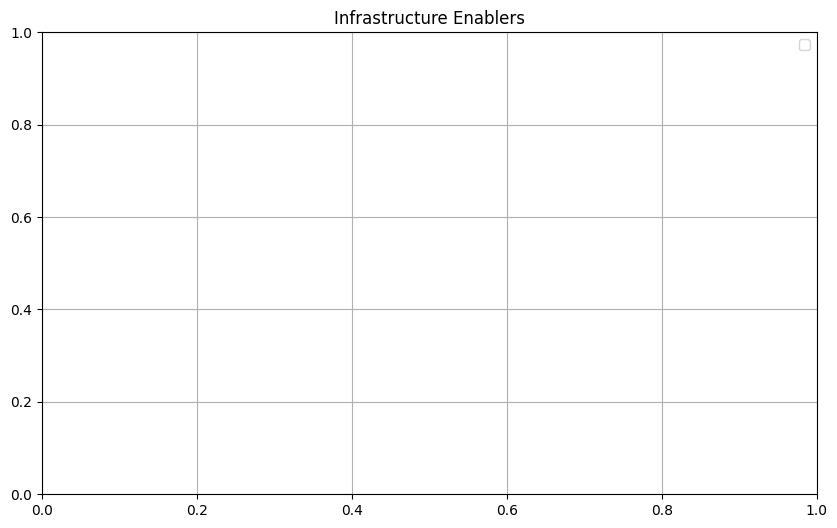

In [7]:
infra_codes = [
    "smartphone_penetration_pct",
    "4g_coverage_pct",
    "electricity_access_pct"
]

infra = obs[obs["indicator_code"].isin(infra_codes)]

plt.figure(figsize=(10, 6))
for code, g in infra.groupby("indicator_code"):
    plt.plot(g["observation_date"], g["value_numeric"], marker="o", label=code)

plt.legend()
plt.title("Infrastructure Enablers")
plt.grid(True)
plt.show()


In [9]:
# Separate events
events = obs[obs["record_type"] == "event"].copy()

# Identify the correct date column
date_col = None
for c in ["event_date", "observation_date", "date"]:
    if c in events.columns:
        date_col = c
        break

print("Using event date column:", date_col)


Using event date column: observation_date


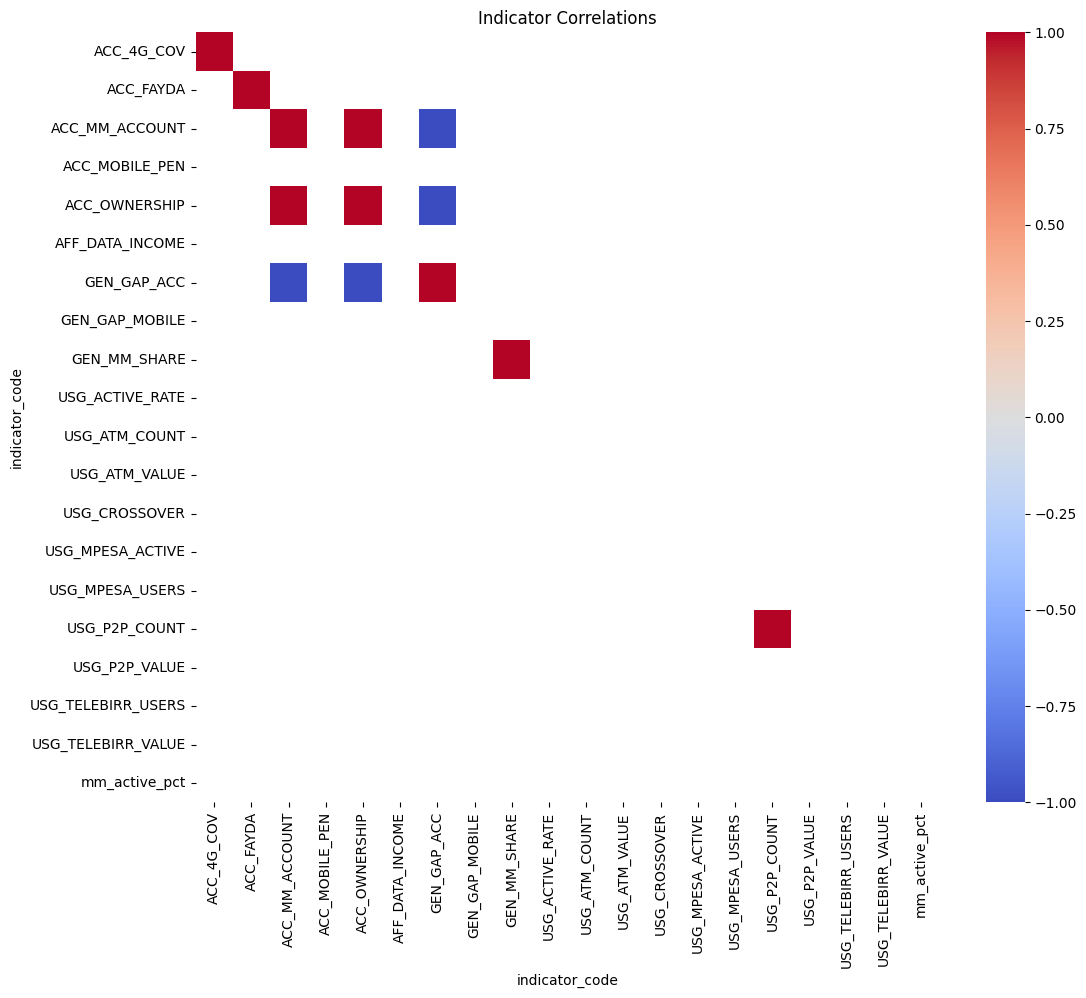

In [10]:
wide = obs.pivot_table(
    index="observation_date",
    columns="indicator_code",
    values="value_numeric"
)

plt.figure(figsize=(12, 10))
sns.heatmap(wide.corr(), cmap="coolwarm", center=0)
plt.title("Indicator Correlations")
plt.show()
